In [1]:
import numpy as np 
from Option import Option
from Dynamic_programming import DynamicPricing
from Monte_carlo import MonteCarlo_simulator
from Black_Scholes import black_scholes
from collections import Counter

# Geometric Brownian Motion

## Monte carlo Simulations

In [2]:
r = 0
sigma = 0.02
S0 = 1
L = 10
n =1000
m = 50 
k=0.95

In [4]:
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)
payoff_0 = call.payoff(S0)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Simulate payoff
price_simulation = Simulation.monte_carlo_price_simulator()

payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff,price_simulation)

Visualising the monte carlo paths

In [4]:
#Simulation.visualisation_price(price_simulation)

## Dynamic Pricing

### Using Laguerre Basis

In [4]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 0.05001054562944907
Dynamic Pricing: 0.050000000000000044
Dynamic Pricing: 0.050517536463950026
Dynamic Pricing: 0.0503366316172131
Dynamic Pricing: 0.05033537223093594


### Using Polynomial Basis

In [5]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 0.050312912705193266
Dynamic Pricing: 0.050547756422128734
Dynamic Pricing: 0.050122048843353646
Dynamic Pricing: 0.05047481054724353
Dynamic Pricing: 0.050000000000000044


## Comparaison of the results with European option price using Black Scholes 

In [7]:
p=black_scholes(S0, k, L, r, sigma, option_type='call')
print("The price of european option is ",p)

The price of european option is  0.050000000000000044


## Optimal Exercise Boundary
 Verify that the dynamic programming algorithm accurately identifies the optimal exercise boundary, i.e., the boundary at which it is optimal to exercise the option rather than holding it. This boundary should be consistent with theoretical expectations and market conditions.

In [8]:
data=[]
for i in range(10):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,tau=dynamic.dynamic_prog_price()
    #print(tau)
    # Compte la fréquence de chaque élément dans la liste
    counts = Counter(tau[0,:])
    # Trouve la valeur avec la fréquence maximale
    optimal_Tau, _ = counts.most_common(1)[0]
    data.append(optimal_Tau)
    print("option's exercise time:", optimal_Tau)

option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 2.0
option's exercise time: 3.0
option's exercise time: 2.0
option's exercise time: 2.0


3.0


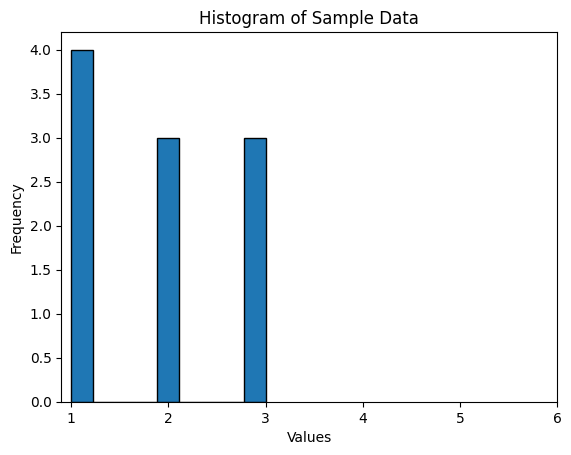

In [9]:
import matplotlib.pyplot as plt
# Determine the range of the data
data_min = min(data)
data_max = max(data)
print(data_max - data_min + 1)
# Plot histogram
plt.hist(data, bins=9,  edgecolor='black')
plt.title('Histogram of Sample Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(range(int(data_min), 7))  # Adjust x-axis ticks to align with integer values
plt.show()

Observing that executing the option early, particularly before day 4 or 5, appears optimal, especially for a maturity of 10, underscores the significance of our findings. To further substantiate the precision and effectiveness of our dynamic programming approach, we aim to validate it against benchmark datasets featuring established exercise boundaries and option prices.

## Convergence of the algorithm

In [10]:
prices=[]

for i in range(100,10000,500):
    dynamic=DynamicPricing(S0, L, i,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    prices.append(u)
    print("option price:", u)

option price: 0.052353503429068464
option price: 0.050100262446999354
option price: 0.05044464812275302
option price: 0.05007034669621538
option price: 0.050000000000000044
option price: 0.05003007896913297
option price: 0.050000000000000044
option price: 0.050000000000000044
option price: 0.050001659034399036
option price: 0.050000000000000044
option price: 0.05002342118252059
option price: 0.050000000000000044
option price: 0.050000000000000044
option price: 0.050035982084318
option price: 0.050000000000000044
option price: 0.050069748812301765
option price: 0.050011650123550355
option price: 0.050000000000000044
option price: 0.05001083172634048
option price: 0.05001817991449891


take 9m45s

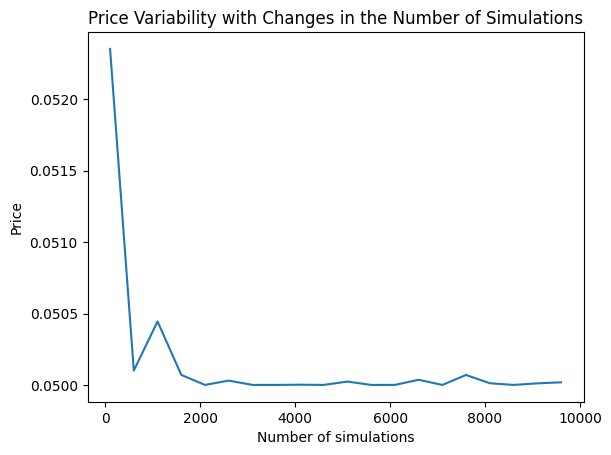

In [12]:
X=[i for i in range(100,10000,500)]

plt.plot(X,prices)
plt.title("Price Variability with Changes in the Number of Simulations")
plt.xlabel('Number of simulations')
plt.ylabel('Price')
plt.show()

## The price of the American option as a function of the maturity

### Using Laguerre Basis

We can see that the algorithm converges as n takes larger values

In [10]:
prices=[]
n=2000
m=50
r=0.0
prices_european=[]
for L in range(1,10):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    prices.append(u)
    p=black_scholes(S0, k, L, r, sigma, option_type='call')
    print("American option price:", u,"The price of European option is ",p)
    prices_european.append(p)

American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050142133820004924 The price of European option is  0.050000000000000044


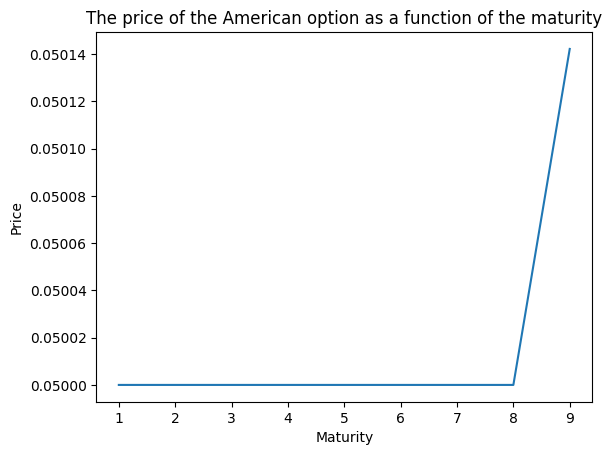

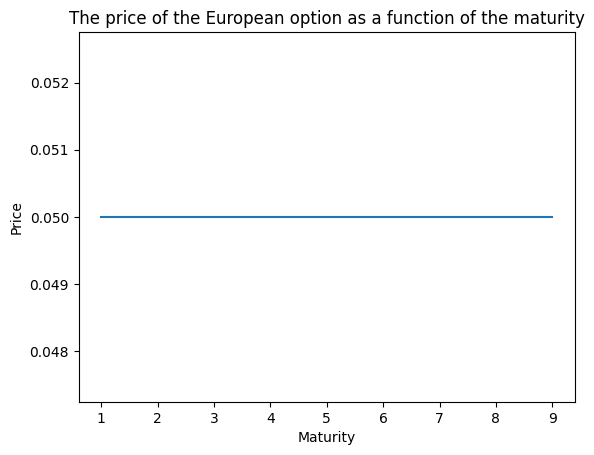

In [11]:
X=[i for i in range(1,10)]
import matplotlib.pyplot as plt
plt.plot(X,prices)
plt.title("The price of the American option as a function of the maturity")
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.show()
plt.plot(X,prices_european)
plt.title("The price of the European option as a function of the maturity")
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.show()

### Using Polynomial Basis

In [42]:
prices1=[]
n=5000
m=50
r=0.0
prices_european1=[]
for L in range(1,20):
    dynamic=DynamicPricing(S0, L, n,m,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u1,_=dynamic.dynamic_prog_price()
    prices1.append(u1)
    p1=black_scholes(S0, k, L, r, sigma, option_type='call')
    print("American option price:", u1,"The price of European option is ",p1)
    prices_european1.append(p1)

American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050136885330579896 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050000000000000044 The price of European option is  0.050000000000000044
American option price: 0.050046104602436615 The price of European option is  0.050000000000000044
American option price: 0.05007153104725305 The price of European option is  0.050000000000000044
American option price: 0.05005877099087842 The price of European option is  0.050000000000000044
American option price: 0.05011947003034443 The price of European option is  0.050000000000000044
American option price: 

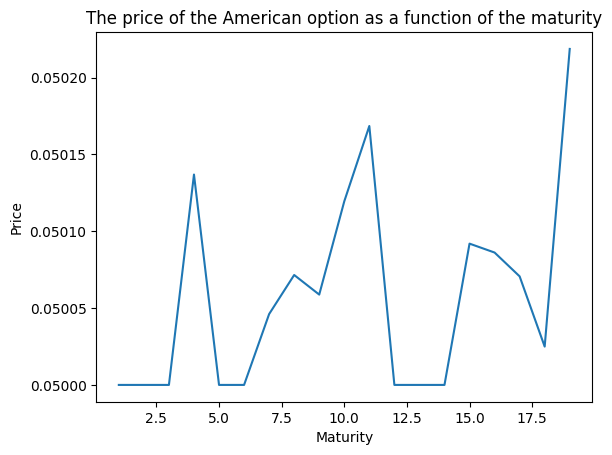

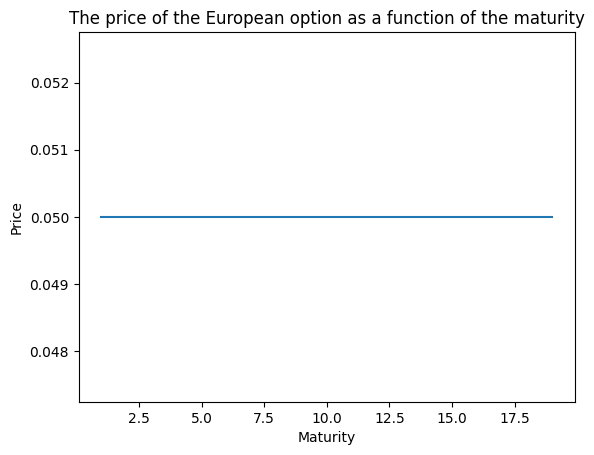

In [43]:
Y=[i for i in range(1,20)]
import matplotlib.pyplot as plt
plt.plot(Y,prices1)
plt.title("The price of the American option as a function of the maturity")
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.show()
plt.plot(Y,prices_european1)
plt.title("The price of the European option as a function of the maturity")
plt.xlabel('Maturity')
plt.ylabel('Price')
plt.show()

## Sensitivity analysis

### Volatility

In [15]:
eps=0.01
r = 0.05
sigma = 0.1
S0 = 100
L = 10
n =1000
m = 50 
k=95

In [16]:

dynamic=DynamicPricing(S0, L, 8000,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
u,_=dynamic.dynamic_prog_price()
print("option price:", u)

option price: 5.3765418824996605
